<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/bdm/KicapSambal/case_study1/cs1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: Exploratory Data Analysis using Python test

# Property Listings in Kuala Lumpur
Link to Dataset: https://www.kaggle.com/datasets/dragonduck/property-listings-in-kuala-lumpur/data


---



The dataset that we obtained from Kaggle contains property listings in Kuala Lumpur, Malaysia. The dataset provides a tabular representation of property listings that were scraped from a property listing website.

In this project, the primary goal is to perform an exploratory data analysis (EDA) on a dataset containing property information. The EDA aims to uncover insights and patterns within the data that can inform decision-making and further analysis. The specific objectives are to understand the relationships between different property features and gain a better understanding of what factors influence property prices.

We will employ tools such as `io`, `Pandas`, `NumPy`, and `Matplotlib` for data manipulation, analysis, and visualization. The EDA tools chosen are `QuickDA`,`Pandas-Profiling`, and` SweetViz`.

Some of the visualization graphs our group has made to gain the insight from the dataset are
* scatter plot
* bar plot
* box plot
* heatmap
* barchart

Our primary goal is to leverage this dataset to gain a deeper understanding of the real estate market in Kuala Lumpur. We aim to answer questions related to property trends, pricing, and geographical distribution. Additionally, we intend to identify any patterns or correlations that can be useful for prospective buyers, sellers, or real estate professionals.

.

**TEAM MEMBERS:**
```
ZUHAYR ARIF BIN ZAKARIA (MCS231002)
MOHD NOR BIN MOHIDIN (MCS231008)
NABILA HUSNA BINTI ROSLI (MCS231009)
NUR AZIMAH BINTI MOHD SALLEH (MCS231011)
```

## Downloading the Dataset

Let's begin by downloading the data, and listing the files within the dataset.

The dataset has been downloaded and extracted.

## Data Preparation and Cleaning

> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

###Load the dataset into a data frame (df) using Pandas

In [2]:
# Import necessary library
import io
import pandas as pd
import re
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/drshahizan/Python_EDA/main/assignment/bdm/KicapSambal/KLProperties.csv')

###Explore the number of rows & columns, ranges of values etc.

In [3]:
# Explore the number of rows & columns
df.shape

(53883, 8)

In [4]:
# Get basic information about the dataset
df.info

<bound method DataFrame.info of                               Location         Price Rooms  Bathrooms  \
0                   KLCC, Kuala Lumpur  RM 1,250,000   2+1        3.0   
1      Damansara Heights, Kuala Lumpur  RM 6,800,000     6        7.0   
2                Dutamas, Kuala Lumpur  RM 1,030,000     3        4.0   
3                 Cheras, Kuala Lumpur           NaN   NaN        NaN   
4            Bukit Jalil, Kuala Lumpur    RM 900,000   4+1        3.0   
...                                ...           ...   ...        ...   
53878            Bangsar, Kuala Lumpur  RM 5,100,000   5+1        4.0   
53879            Bangsar, Kuala Lumpur  RM 5,000,000     5        4.0   
53880            Bangsar, Kuala Lumpur  RM 5,500,000   5+1        4.0   
53881        Wangsa Maju, Kuala Lumpur    RM 480,000     3        2.0   
53882            Setapak, Kuala Lumpur    RM 540,000     4        2.0   

       Car Parks               Property Type                       Size  \
0            2.0

In [5]:
# Display summary statistics for numerical columns
df.describe()

,Bathrooms,Car Parks
count,51870.000000,36316.000000
mean,3.073434,2.007848
std,1.631079,1.310427
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,2.000000
75%,4.000000,2.000000
max,20.000000,30.000000


In [6]:
# View the first few rows of the dataset
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


In [7]:
# Check data types of each columns
df.dtypes

Location          object
Price             object
Rooms             object
Bathrooms        float64
Car Parks        float64
Property Type     object
Size              object
Furnishing        object
dtype: object

### Check for missing values

In [8]:
# Check missing values in the dataframe
df.isnull().sum()

Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64

In [9]:
# Drop rows with missing values
df = df.dropna()

In [10]:
# Check updated data shape (rows, columns)
df.shape

(31899, 8)

###Clean up the **Price** column

*   remove rows where the Price column has missing values
*   remove currency symbol
*   convert value to numeric


In [11]:
# Remove the currency symbol
def remove_currency(currency_string, input_string):
    output_string = re.sub(currency_string,'',input_string)
    return(output_string)

In [ ]:
# Remove currency symbol from remaining rows
df['Price'] = df['Price'].apply(lambda x: remove_currency("RM ",x))


In [ ]:
# Convert Price column to float
df['Price'] = pd.to_numeric(df['Price'].str.replace(',',''), errors='coerce')
df.head()

###Clean up the **Location** column

*   make everything lower case
*   remove the city the 'Kuala Lumpur' name as explicitly only scraped entries from Kuala Lumpur
*   remove entries in locations with fewer than  100 properties listed


In [ ]:
# Set the location to lower case letters
df['Location'] = df['Location'].str.title()

# Remove the city name as it only scraped entries from Kuala Lumpur
df["Location"] = df["Location"].str.replace(r", Kuala Lumpur$", "")

In [15]:
# View the unique location values
sorted(df["Location"].unique())

['Ampang',
 'Ampang Hilir',
 'Bandar Damai Perdana',
 'Bandar Menjalara',
 'Bandar Tasik Selatan',
 'Bangsar',
 'Bangsar South',
 'Batu Caves',
 'Brickfields',
 'Bukit Bintang',
 'Bukit Damansara',
 'Bukit Jalil',
 'Bukit Kiara',
 'Bukit Ledang',
 'Bukit Tunku (Kenny Hills)',
 'Canary Residence',
 'Casa Rimba',
 'Chan Sow Lin',
 'Cheras',
 'City Centre',
 'Country Heights Damansara',
 'Damansara',
 'Damansara Heights',
 'Desa Pandan',
 'Desa Parkcity',
 'Desa Petaling',
 'Duta Nusantara',
 'Dutamas',
 'Federal Hill',
 'Gombak',
 'Gurney',
 'Happy Garden',
 'Jalan Ipoh',
 'Jalan Klang Lama (Old Klang Road)',
 'Jalan Kuching',
 'Jalan Sultan Ismail',
 'Jalan U-Thant',
 'Jinjang',
 'Kepong',
 'Keramat',
 'Kl City',
 'Kl Eco City',
 'Kl Sentral',
 'Klcc',
 'Kota Damansara',
 'Kuala Lumpur',
 'Kuchai Lama',
 'Mid Valley City',
 'Mont Kiara',
 'Other',
 'Oug',
 'Pandan Indah',
 'Pandan Jaya',
 'Pandan Perdana',
 'Pantai',
 'Petaling Jaya',
 'Puchong',
 'Rawang',
 'Salak Selatan',
 'Segambut'

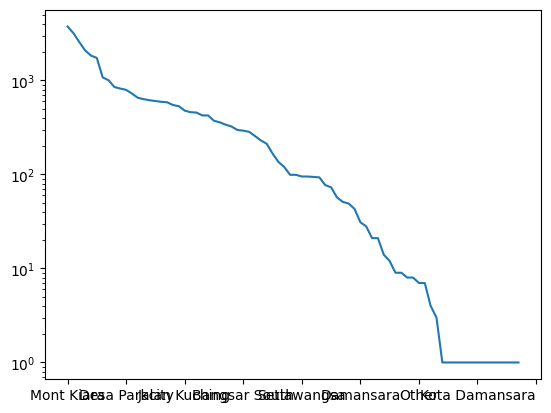

In [16]:
# View location that consists less than 100 properties listed
df["Location"].value_counts().plot(logy=True);

In [17]:
# Remove entries in locations with fewer than  100 properties listed
significant_locations = df["Location"].value_counts()[df["Location"].value_counts() >= 100].index
properties = df.loc[np.isin(df["Location"], significant_locations)]

In [18]:
# View the updated unique location values
sorted(df["Location"].unique())

['Ampang',
 'Ampang Hilir',
 'Bandar Damai Perdana',
 'Bandar Menjalara',
 'Bandar Tasik Selatan',
 'Bangsar',
 'Bangsar South',
 'Batu Caves',
 'Brickfields',
 'Bukit Bintang',
 'Bukit Damansara',
 'Bukit Jalil',
 'Bukit Kiara',
 'Bukit Ledang',
 'Bukit Tunku (Kenny Hills)',
 'Canary Residence',
 'Casa Rimba',
 'Chan Sow Lin',
 'Cheras',
 'City Centre',
 'Country Heights Damansara',
 'Damansara',
 'Damansara Heights',
 'Desa Pandan',
 'Desa Parkcity',
 'Desa Petaling',
 'Duta Nusantara',
 'Dutamas',
 'Federal Hill',
 'Gombak',
 'Gurney',
 'Happy Garden',
 'Jalan Ipoh',
 'Jalan Klang Lama (Old Klang Road)',
 'Jalan Kuching',
 'Jalan Sultan Ismail',
 'Jalan U-Thant',
 'Jinjang',
 'Kepong',
 'Keramat',
 'Kl City',
 'Kl Eco City',
 'Kl Sentral',
 'Klcc',
 'Kota Damansara',
 'Kuala Lumpur',
 'Kuchai Lama',
 'Mid Valley City',
 'Mont Kiara',
 'Other',
 'Oug',
 'Pandan Indah',
 'Pandan Jaya',
 'Pandan Perdana',
 'Pantai',
 'Petaling Jaya',
 'Puchong',
 'Rawang',
 'Salak Selatan',
 'Segambut'

###Clean up the **Size** column

*   lowercase values
*   split the dimension values from the size type values
*   remove records with no numeric values
*   remove records with problematic values


In [19]:
df['Size'].head(10)

0      Built-up : 1,335 sq. ft.
2      Built-up : 1,875 sq. ft.
4      Built-up : 1,513 sq. ft.
5      Land area : 7200 sq. ft.
7      Land area : 3600 sq. ft.
8     Land area : 25x75 sq. ft.
9        Built-up : 904 sq. ft.
13     Land area : 6000 sq. ft.
16     Land area : 8500 sq. ft.
18     Built-up : 1,830 sq. ft.
Name: Size, dtype: object

In [20]:
# Get the count of rows where the Size column has no digits
df[~df.Size.str.contains(r'\d')].shape

(39, 8)

In [ ]:
# Lowercase values
# df['Size'] = df['Size'].str.lower()

# Split the Size column into two columns
df[['Size_type','Size']] = df['Size'].str.split(':',expand=True)

# Replace missing values in the Size column with 0
df['Size'] = df['Size'].fillna("0")

# Remove rows from Size that do not contain any digits
df = df[df.Size.str.contains(r'\d')]

In [22]:
# Clean the characters in the list
clean_up_list = ["-","\+",'\'','\~',"xx","sf","acre","#"]

for string in clean_up_list:
  df = df[~df.Size.str.contains(string,na=False)]

In [23]:
df.shape

(31771, 9)

In [24]:
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Size_type
0,Klcc,1250000,2+1,3.0,2.0,Serviced Residence,"1,335 sq. ft.",Fully Furnished,Built-up
2,Dutamas,1030000,3,4.0,2.0,Condominium (Corner),"1,875 sq. ft.",Partly Furnished,Built-up
4,Bukit Jalil,900000,4+1,3.0,2.0,Condominium (Corner),"1,513 sq. ft.",Partly Furnished,Built-up
5,Taman Tun Dr Ismail,5350000,4+2,5.0,4.0,Bungalow,7200 sq. ft.,Partly Furnished,Land area
7,Taman Tun Dr Ismail,2600000,5,4.0,4.0,Semi-detached House,3600 sq. ft.,Partly Furnished,Land area


In [25]:
# Function to remove everything after the space in a string
def remove_after_space(input_string):

    # Remove leading and trailing spaces
    input_string = input_string.strip()

    # Remove everything after internal spaces
    output_string = re.sub(r'\s* .*', '', input_string)
    output_string = re.sub(r'\([^)]*\)','',output_string)

    # Print('output:',output_string)
    return(output_string)


def clean_up_size(df):

  # Replace extraneous characters so that all Size entries are either numeric or of the form "numerica * numericb"
  df['Size'] = df['Size'].str.replace(',','').str.replace('`','').str.replace('@','x').str.replace('\+ sq. ft.','')
  df['Size'] = df['Size'].str.replace(' sq. ft.','').str.replace('sf sq. ft.','').str.replace('ft','').str.replace('sq','').str.replace("xx","*").str.replace("x ","*").str.replace(" x","*").str.replace("x","*").str.replace("X","*").replace('\'','')

  # Remove extraneous characters following spaces
  df['Size'] = df['Size'].apply(lambda x: remove_after_space(x))

  # Apply transformation to replace "numerica * numericb" with the result of the multiplication
  df['Size'] = df['Size'].apply(lambda x: eval(str(x)))
  return(df)

In [ ]:
# Use function 'clean_up_size' on the dataframe
df = clean_up_size(df)


In [27]:
df.shape

(31771, 9)

In [28]:
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Size_type
0,Klcc,1250000,2+1,3.0,2.0,Serviced Residence,1335.0,Fully Furnished,Built-up
2,Dutamas,1030000,3,4.0,2.0,Condominium (Corner),1875.0,Partly Furnished,Built-up
4,Bukit Jalil,900000,4+1,3.0,2.0,Condominium (Corner),1513.0,Partly Furnished,Built-up
5,Taman Tun Dr Ismail,5350000,4+2,5.0,4.0,Bungalow,7200.0,Partly Furnished,Land area
7,Taman Tun Dr Ismail,2600000,5,4.0,4.0,Semi-detached House,3600.0,Partly Furnished,Land area


###Clean up the **Bathrooms** column


In [29]:
df["Bathrooms"].value_counts(dropna=False)

2.0     14567
3.0      5657
4.0      4013
1.0      2611
5.0      2546
6.0      1553
7.0       509
8.0       187
9.0        68
10.0       28
20.0        9
12.0        8
13.0        5
15.0        4
11.0        4
16.0        1
14.0        1
Name: Bathrooms, dtype: int64

###Clean up the **Car Parks** column


In [30]:
df["Car Parks"].value_counts(dropna=False)

2.0     13332
1.0     12036
3.0      3362
4.0      1783
6.0       550
5.0       461
8.0        84
10.0       74
7.0        52
15.0        7
13.0        5
12.0        4
28.0        4
9.0         4
11.0        3
20.0        3
30.0        3
18.0        1
24.0        1
16.0        1
17.0        1
Name: Car Parks, dtype: int64

###Clean up the **Number of Rooms** column

The number of rooms contains some irregularities. For example, it is common for rooms to be listed as N+M instead of the total number of rooms. I want to clean the Rooms column and introduce a numerical equivalent.


In [31]:
# View sorted 'Rooms' column unique value
sorted(df["Rooms"].unique().astype(str))

['1',
 '1+1',
 '1+2',
 '10',
 '10+',
 '10+1',
 '11',
 '12',
 '12+',
 '13',
 '13+',
 '13+1',
 '14',
 '15+',
 '16',
 '2',
 '2+1',
 '2+2',
 '20 Above',
 '3',
 '3+1',
 '3+2',
 '4',
 '4+1',
 '4+2',
 '5',
 '5+1',
 '5+2',
 '6',
 '6+',
 '6+1',
 '7',
 '7+',
 '7+1',
 '8',
 '8+',
 '8+1',
 '9',
 '9+1',
 'Studio']

In [32]:
# Function to convert the Rooms column values to numerical equivalent
def convert_room_num(rooms):
    try:
        if rooms.endswith("+"):
            return int(rooms[:-1])
        if re.search("[0-9]+\+[0-9]+", rooms) is not None:
            tmp = rooms.split("+")
            return int(tmp[0]) + int(tmp[1])
        if rooms == "20 Above":
            return 20
        if rooms == "Studio":
            return 1
        return int(rooms)
    except AttributeError:
        return rooms

# Use function 'convert_room_num' on the dataframe
df["Rooms Num"] = df["Rooms"].apply(convert_room_num)

In [33]:
df["Rooms Num"].value_counts(dropna=False)

3     10831
4      8174
2      4412
5      3804
1      1799
6      1757
7       720
8       178
9        50
10       23
11        6
12        5
20        4
14        3
13        3
15        1
16        1
Name: Rooms Num, dtype: int64

###Clean up the **Property Type** column

*   Simplify the property types using "super groups"

In [34]:
df["Property Type"].value_counts()

Condominium                             6827
Condominium (Corner)                    4481
Condominium (Intermediate)              4086
Serviced Residence                      4001
Serviced Residence (Intermediate)       2425
                                        ... 
Semi-detached House (Duplex)               1
4-sty Terrace/Link House (Penthouse)       1
3-sty Terrace/Link House (Triplex)         1
2-sty Terrace/Link House (Penthouse)       1
4.5-sty Terrace/Link House (Corner)        1
Name: Property Type, Length: 90, dtype: int64

In [35]:
# Function to simplify the property types using "super groups"
def simplify_property_type(prop_type):
    super_types = [
        "Terrace/Link House", "Serviced Residence", "Condominium",
        "Semi-detached House", "Bungalow", "Apartment", "Townhouse",
        "Flat", "Residential Land", "Cluster House"]
    for super_type in super_types:
        if re.search(super_type, prop_type, flags=re.IGNORECASE) is not None:
            return super_type

    return prop_type

# Use function 'simplify_property_type' on the dataframe
df["Property Type Supergroup"] = df["Property Type"].apply(simplify_property_type)

In [36]:
df["Property Type Supergroup"].value_counts(dropna=False)

Condominium            16072
Serviced Residence      8578
Terrace/Link House      3290
Bungalow                1454
Apartment               1100
Semi-detached House      853
Townhouse                292
Flat                     104
Residential Land          22
Cluster House              6
Name: Property Type Supergroup, dtype: int64

###Clean up the **Furnishing** column


In [37]:
df["Furnishing"].value_counts(dropna=False)

Partly Furnished    18020
Fully Furnished      9819
Unfurnished          3747
Unknown               185
Name: Furnishing, dtype: int64

In [38]:
# Remove entries in price with lesser than RM100k
significant_price = df["Price"].value_counts()[df["Price"].value_counts() >= 100000].index
prop = df.loc[np.isin(df["Price"], significant_price)]

In [39]:
df.head(10)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Size_type,Rooms Num,Property Type Supergroup
0,Klcc,1250000,2+1,3.0,2.0,Serviced Residence,1335.0,Fully Furnished,Built-up,3,Serviced Residence
2,Dutamas,1030000,3,4.0,2.0,Condominium (Corner),1875.0,Partly Furnished,Built-up,3,Condominium
4,Bukit Jalil,900000,4+1,3.0,2.0,Condominium (Corner),1513.0,Partly Furnished,Built-up,5,Condominium
5,Taman Tun Dr Ismail,5350000,4+2,5.0,4.0,Bungalow,7200.0,Partly Furnished,Land area,6,Bungalow
7,Taman Tun Dr Ismail,2600000,5,4.0,4.0,Semi-detached House,3600.0,Partly Furnished,Land area,5,Semi-detached House
8,Taman Tun Dr Ismail,1950000,4+1,4.0,3.0,2-sty Terrace/Link House (EndLot),1875.0,Partly Furnished,Land area,5,Terrace/Link House
9,Sri Petaling,385000,3,2.0,1.0,Apartment (Intermediate),904.0,Partly Furnished,Built-up,3,Apartment
13,Taman Tun Dr Ismail,4580000,6+1,5.0,5.0,Bungalow (Intermediate),6000.0,Partly Furnished,Land area,7,Bungalow
16,Bukit Tunku (Kenny Hills),9000000,6+1,7.0,4.0,Bungalow (Corner),8500.0,Partly Furnished,Land area,7,Bungalow
18,Mont Kiara,1780000,4+1,4.0,2.0,Condominium (Corner),1830.0,Partly Furnished,Built-up,5,Condominium


In [40]:
# View house listing with Price lower than RM 100k
df_below_100k = df[df['Price'] < 100000]
df_below_100k

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Size_type,Rooms Num,Property Type Supergroup
1196,Klcc,7500,2,2.0,1.0,Serviced Residence (Intermediate),1078.0,Fully Furnished,Built-up,2,Serviced Residence
1878,Bukit Bintang,3000,1,1.0,1.0,Condominium (Intermediate),538.0,Fully Furnished,Built-up,1,Condominium
2708,Taman Tun Dr Ismail,2500,3,2.0,1.0,Condominium (Corner),1384.0,Fully Furnished,Built-up,3,Condominium
3958,Bukit Jalil,3300,4+1,4.0,4.0,Condominium (Intermediate),1772.0,Partly Furnished,Built-up,5,Condominium
4004,Dutamas,3000,1,1.0,1.0,Serviced Residence,748.0,Fully Furnished,Built-up,1,Serviced Residence
...,...,...,...,...,...,...,...,...,...,...,...
52592,Bukit Jalil,6000,4+1,4.0,2.0,Condominium,2022.0,Fully Furnished,Built-up,5,Condominium
52771,Jalan Klang Lama (Old Klang Road),1800,3,2.0,2.0,Serviced Residence,1200.0,Fully Furnished,Built-up,3,Serviced Residence
52928,Sri Petaling,1500,3,2.0,1.0,Condominium,850.0,Partly Furnished,Built-up,3,Condominium
52935,Sri Petaling,1100,3,2.0,1.0,Condominium,850.0,Partly Furnished,Built-up,3,Condominium


In [41]:
# Remove rows of house listing that are below than RM 100k
df = df.drop(df[df['Price'] < 100000].index)

df

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Size_type,Rooms Num,Property Type Supergroup
0,Klcc,1250000,2+1,3.0,2.0,Serviced Residence,1335.0,Fully Furnished,Built-up,3,Serviced Residence
2,Dutamas,1030000,3,4.0,2.0,Condominium (Corner),1875.0,Partly Furnished,Built-up,3,Condominium
4,Bukit Jalil,900000,4+1,3.0,2.0,Condominium (Corner),1513.0,Partly Furnished,Built-up,5,Condominium
5,Taman Tun Dr Ismail,5350000,4+2,5.0,4.0,Bungalow,7200.0,Partly Furnished,Land area,6,Bungalow
7,Taman Tun Dr Ismail,2600000,5,4.0,4.0,Semi-detached House,3600.0,Partly Furnished,Land area,5,Semi-detached House
...,...,...,...,...,...,...,...,...,...,...,...
53862,Seputeh,750000,3,2.0,1.0,Condominium,915.0,Partly Furnished,Built-up,3,Condominium
53868,Kl Sentral,1400000,3+1,3.0,2.0,Condominium (Corner),1544.0,Fully Furnished,Land area,4,Condominium
53869,Kl Eco City,880000,1,1.0,1.0,Condominium (Corner),650.0,Partly Furnished,Built-up,1,Condominium
53876,Sri Hartamas,2700000,4+2,6.0,3.0,Condominium (Corner),3973.0,Partly Furnished,Built-up,6,Condominium


###Exporting data that has been cleaned to upload to github

In [ ]:
# Export transformed table to .csv
df.to_csv(f"cleaned_KLProperties.csv",index=False)

## Exploratory Analysis and Visualization


> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

####Compute the mean, sum, range and other interesting statistics for numeric columns

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [42]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import ScalarFormatter

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [43]:
# Check data types of each columns
df.dtypes

Location                     object
Price                         int64
Rooms                        object
Bathrooms                   float64
Car Parks                   float64
Property Type                object
Size                        float64
Furnishing                   object
Size_type                    object
Rooms Num                     int64
Property Type Supergroup     object
dtype: object

In [44]:
# Display summary statistics for numerical columns
df.describe()

,Price,Bathrooms,Car Parks,Size,Rooms Num
count,3.152900e+04,31529.000000,31529.000000,31529.000000,31529.000000
mean,1.589901e+06,2.937423,2.015446,2149.701948,3.554188
std,2.136244e+06,1.534695,1.311117,9528.081744,1.409447
min,1.100000e+05,1.000000,1.000000,0.000000,1.000000
25%,5.700000e+05,2.000000,1.000000,1000.000000,3.000000
50%,9.000000e+05,2.000000,2.000000,1316.000000,3.000000
75%,1.720000e+06,4.000000,2.000000,1994.000000,4.000000
max,5.128101e+07,20.000000,30.000000,820000.000000,20.000000




---



####Explore distributions of numeric columns using few graphs and explore the relationship between columns.

**Price Vs Size**

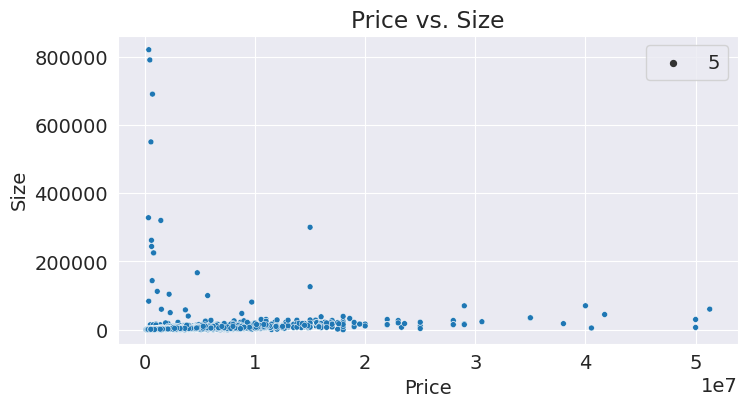

In [47]:
# Scatter Plot (Price vs. Size)
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Price', y='Size', size=5)  # Set a constant size
plt.title('Price vs. Size')
plt.show()

The scatter plot shows some variation in prices for properties of similar sizes, suggesting that other factors, such as location or property type, may influence pricing.

In general, there seems to be a positive correlation between the "Price" and "Size" of properties. As the size of a property increases, its price tends to increase as well.



---



**Rooms Vs Price**

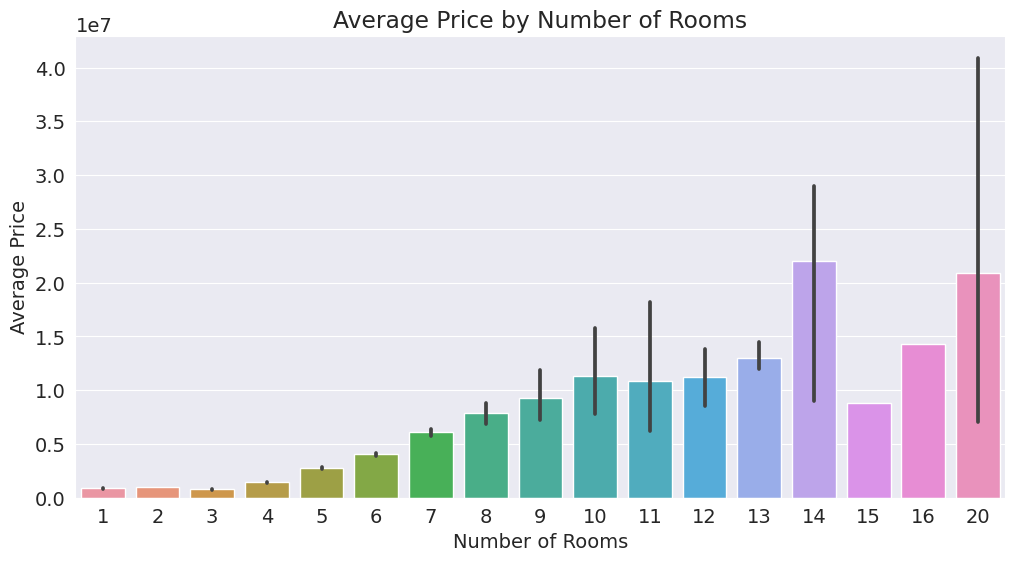

In [48]:
# Bar Plot (Rooms by Price)
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Rooms Num', y='Price')
plt.title('Average Price by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Average Price')
plt.show()

The bar plot indicates that properties with a higher number of rooms tend to have a higher average price. This suggests that the number of rooms is a significant factor in determining the price of a property.



---



**Price Vs Rooms Num**

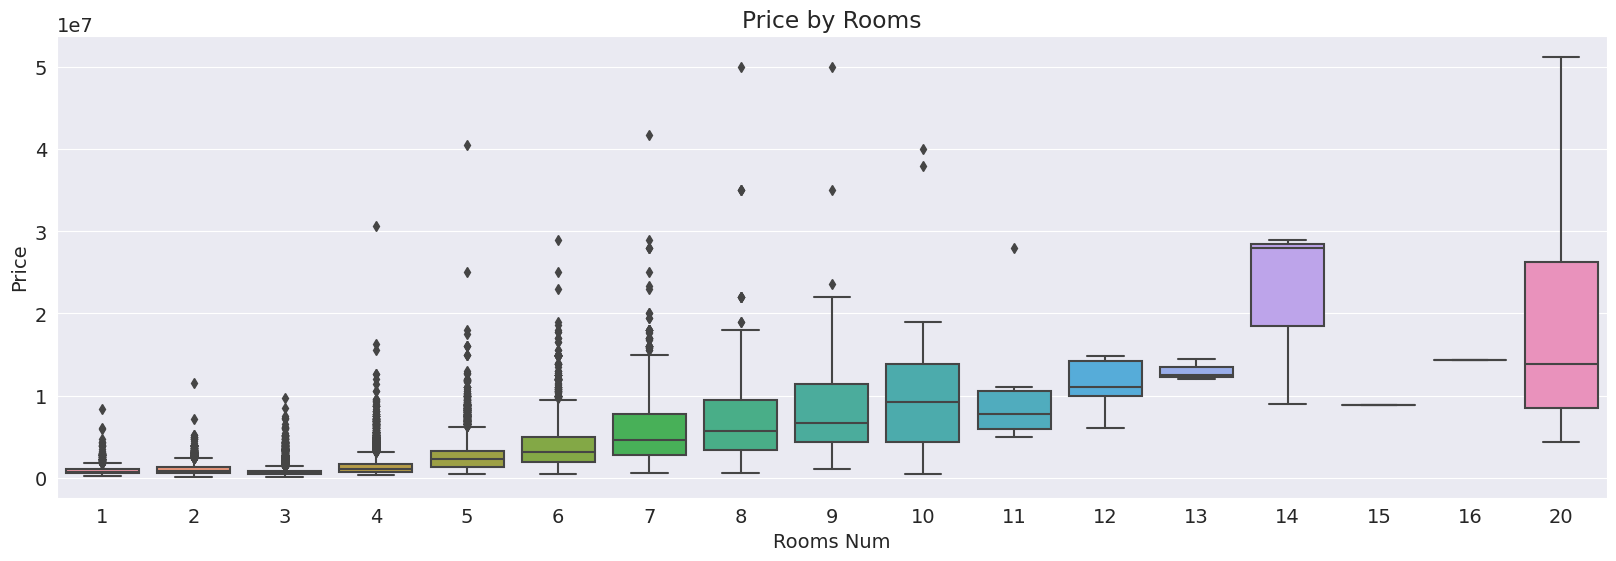

In [49]:
# Box Plot (Price by Rooms)
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='Rooms Num', y='Price')
plt.title('Price by Rooms')

plt.show()

The box plot demonstrates the variability in prices for different room types. Properties with three rooms have the widest price range, indicating that room count alone is not the sole determinant of price. Other factors may contribute to this variability.



---



**Correlation Heatmap**

<ipython-input-50-bbaa31fa61c7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


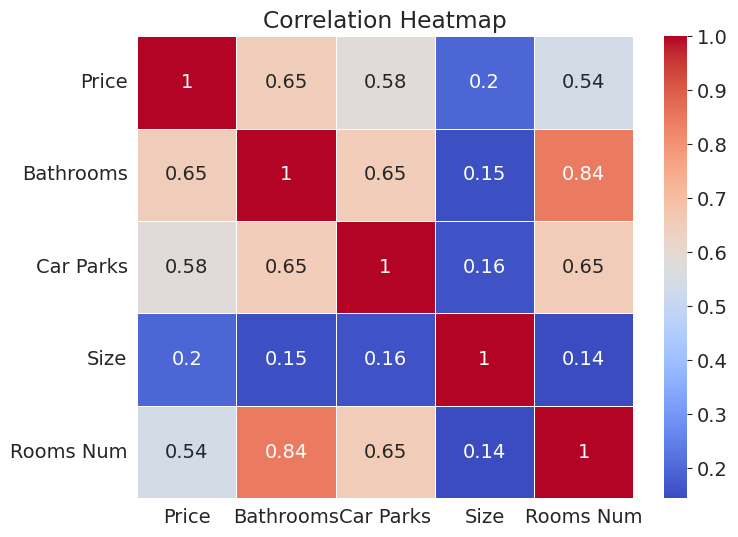

In [50]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap provides a visual representation of the relationships between numerical variables in the dataset. It indicates that "Price" is positively correlated with both "Size" and the number of rooms, suggesting that these variables play a role in determining property prices. However, the heatmap also suggests that there is no strong negative correlation or significant multicollinearity among the variables.



---



## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



### **Q1: What are the top 5 location in Kuala Lumpur with the highest and lowest price?**

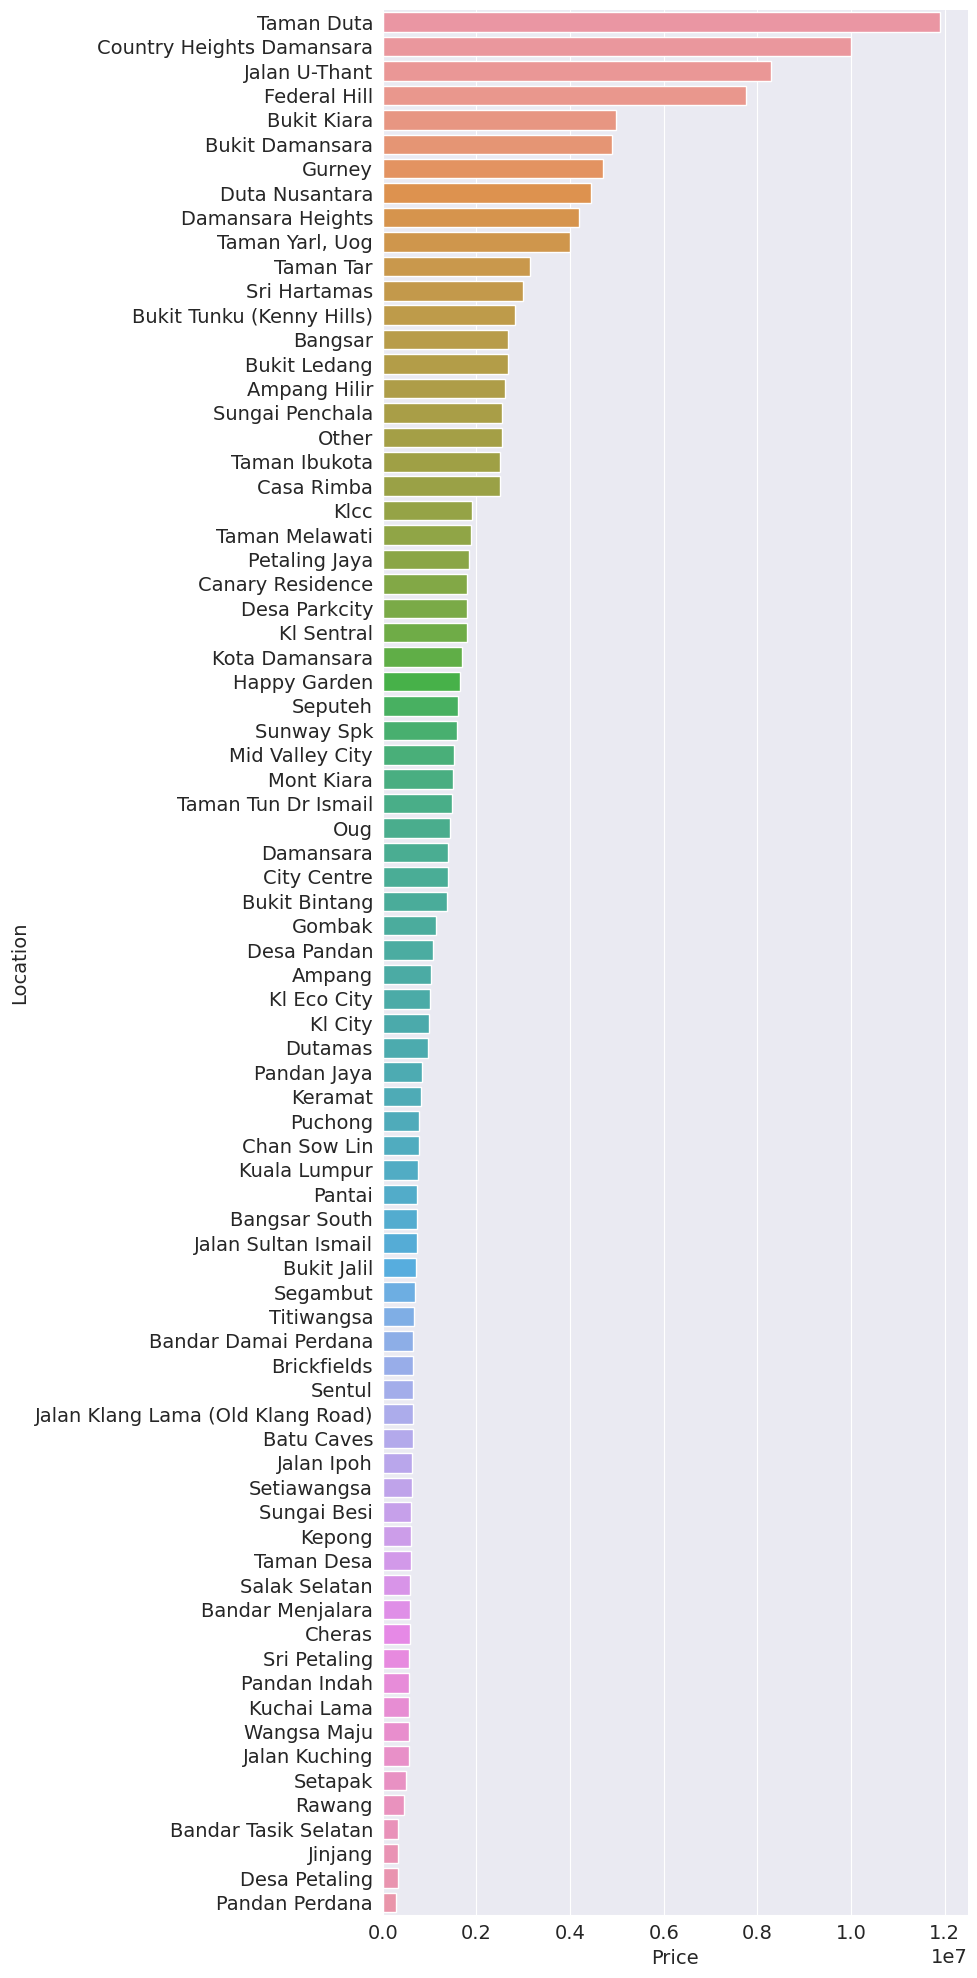

In [ ]:
#Graph (Bar Chart of Price vs Location)

group=df.groupby("Location")['Price'].median().sort_values(ascending=False).reset_index()

fig = sns.catplot(
        data=group, x="Price", y="Location", kind="bar",
         height=20, aspect=0.5)

**ANSWER:**

Top 5 Highest Price

1 : `Taman Duta`

2 : `Country Heights Damansara`

3 : `Jalan U-Thant`

4 :` Federal Hill`

5 : `Bukit Kiara`

Top 5 Lowest Price

1 : `Pandan Perdana`

2 : `Desa Petaling`

3 : `Jinjang`

4 :` Bandara Tasik Selatan`

5 : `Rawang`

### **Q2: What is the average price of properties in Kuala Lumpur and in each location in Kuala Lumpur?**

In [ ]:
# calculate the average price of all properties
df['Price'].mean().round(2)

1589900.81

In [ ]:
# group the data by location
# compute mean price for each location and rename the column to "Average_Price_RM"
# round mean price to 2 decimal places and sort the values in descending order
df.groupby(['Location']).agg(Average_Price_RM=('Price', 'mean')).round(2).sort_values(by=['Average_Price_RM'], ascending=False)


,Average_Price_RM
Location,
Taman Duta,13677857.14
Country Heights Damansara,8684139.53
Jalan U-Thant,8280000.00
Federal Hill,6468750.00
Bukit Tunku (Kenny Hills),6184228.12
...,...
Bandar Tasik Selatan,493548.73
Pandan Perdana,468246.58
Jinjang,460714.29


**ANSWER**

The average price of properties in Kuala Lumpur is` RM 1,589,900.81`. The location with the highest average property price is` Taman Duta` with average price of RM `13,677,857.14` whereas `Desa Petaling` is the lowest average property price in Kuala Lumpur with average price of `RM 345,258.95.`

### **Q3: What are the most common numbers of bedrooms and bathrooms offered by the properties in Kuala Lumpur?**

In [ ]:
# groupby() splits the data into groups and size() return the number of elements in each groups
df.groupby(['Rooms Num','Bathrooms']).size().sort_values(ascending=False)

Rooms Num  Bathrooms
3          2.0          8968
2          2.0          3297
4          3.0          3294
           4.0          2308
           2.0          1874
                        ... 
9          5.0             1
10         11.0            1
1          3.0             1
10         1.0             1
4          20.0            1
Length: 93, dtype: int64

**ANSWER**

`3 bedrooms` and` 2 bathrooms` properties are the most common type of properties offered in Kuala Lumpur.

### **Q4: What are the most common property type in the top 5 location with the highest price in Kuala Lumpur?**

In [71]:
# Identify the top 5 locations with the highest average prices
top_locations_high_price = df.groupby('Location')['Price'].mean().sort_values(ascending=False).head(5)

# Display the results
print("Top 5 Locations with Highest Prices:")
print(top_locations_high_price)


Top 5 Locations with Highest Prices:
Location
Taman Duta                   1.367786e+07
Country Heights Damansara    8.684140e+06
Jalan U-Thant                8.280000e+06
Federal Hill                 6.468750e+06
Bukit Tunku (Kenny Hills)    6.184228e+06
Name: Price, dtype: float64


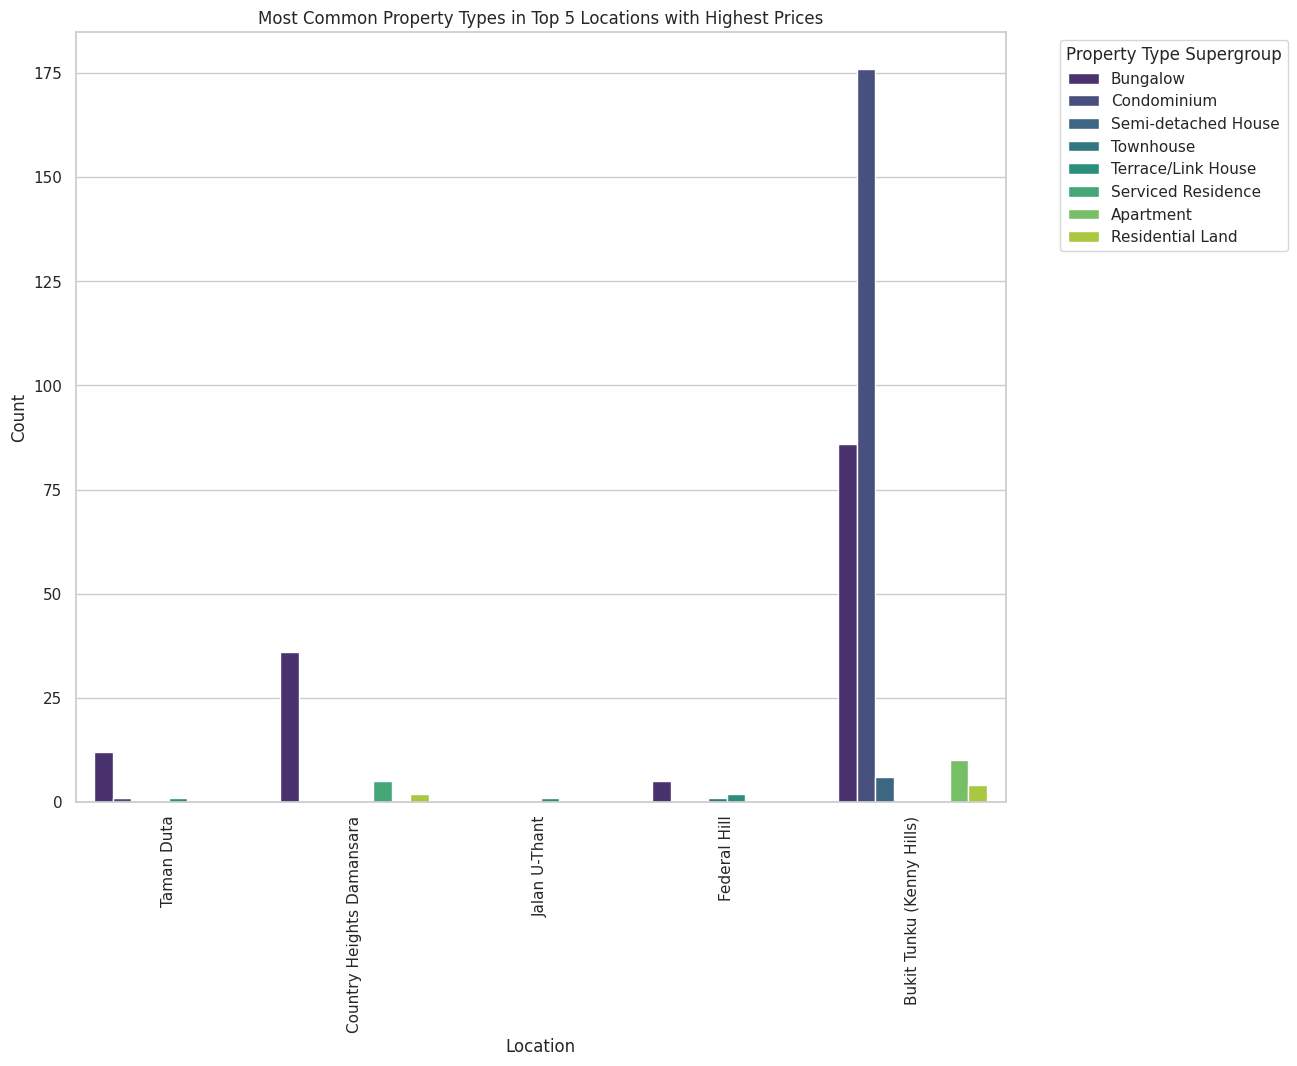

In [72]:
# Sort the DataFrame by Price in descending order and select the top 5 locations
top_locations_high_price = df.groupby('Location')['Price'].mean().sort_values(ascending=False).head(5).index

# Filter the DataFrame for the top 5 locations
df_top5 = df[df['Location'].isin(top_locations_high_price)]

# Generate a cross-tabulation table
cross_tab_top5 = pd.crosstab(df_top5['Location'], df_top5['Property Type Supergroup'])

# Set up the figure and axes
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")

# Create a bar plot
sns.countplot(x='Location', hue='Property Type Supergroup', data=df_top5, order=top_locations_high_price, palette='viridis')

# Add title and labels
plt.title('Most Common Property Types in Top 5 Locations with Highest Prices')
plt.xlabel('Location')
plt.ylabel('Count')

# Display legend
plt.legend(title='Property Type Supergroup', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

**ANSWER**
The most common property types for the top 5 highest price location in Kuala Lumpur:

1. Taman Duta : `Bungalow`                  
2. Country Heights Damansara : `Bungalow`  
3. Jalan U-Thant : `Terrace/Link House`
4. Federal Hill : `Bungalow`
5. Bukit Tunku (Kenny Hills) : `Bungalow`

### **Q5: What is the relationship between size and price of the properties?**

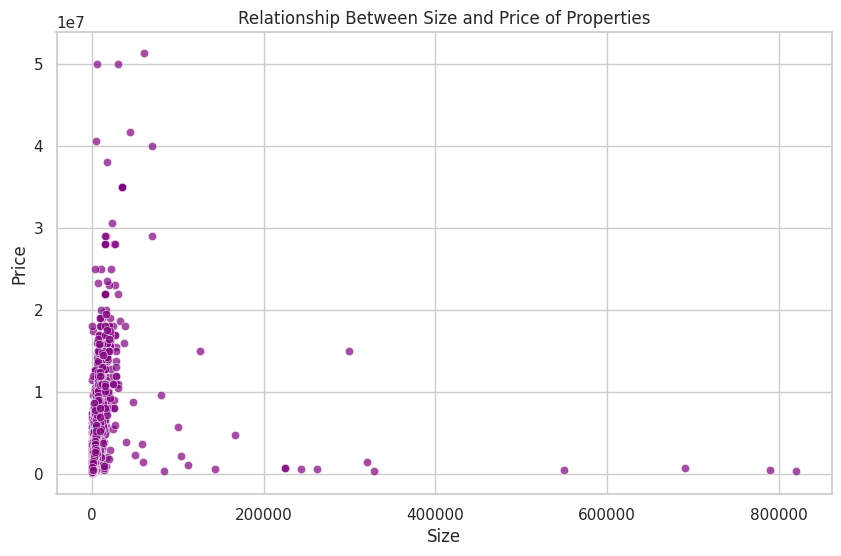

In [67]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a scatter plot
sns.scatterplot(x='Size', y='Price', data=df, color='purple', alpha=0.7)

# Add title and labels
plt.title('Relationship Between Size and Price of Properties')
plt.xlabel('Size')
plt.ylabel('Price')

# Show the plot
plt.show()

**ANSWER**

The relationship between the size of a property and its price, as described, is a `positive correlation`.

### **Q6: What is the number of room that most offered by the properties in Kuala Lumpur?**

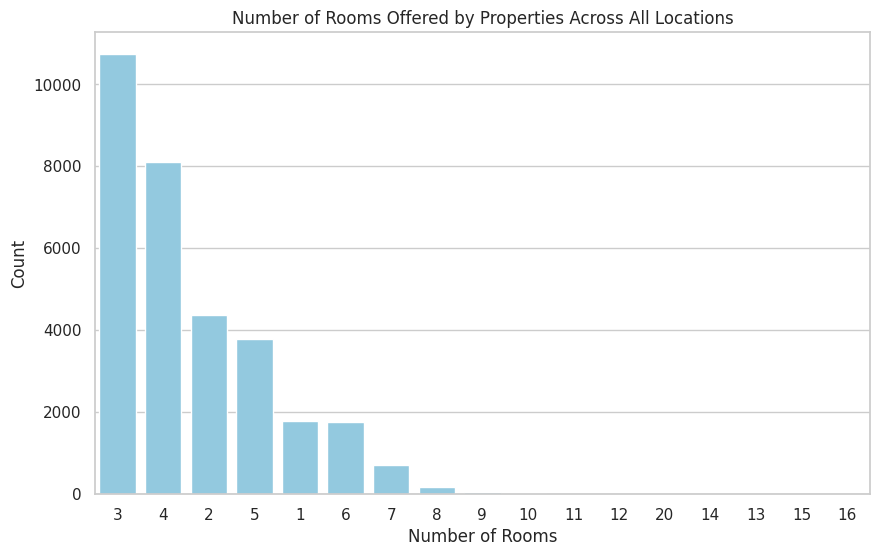

In [61]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a bar plot
sns.countplot(x='Rooms Num', data=df, color='skyblue', order=df['Rooms Num'].value_counts().index)

# Add title and labels
plt.title('Number of Rooms Offered by Properties Across All Locations')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')

# Show the plot
plt.show()

**ANSWER**

The most offered number rooms by the properties in Kuala Lumpur is: `3 rooms`

### **Q7: What is the type of furnishing that most offered by the properties in Kuala Lumpur?**

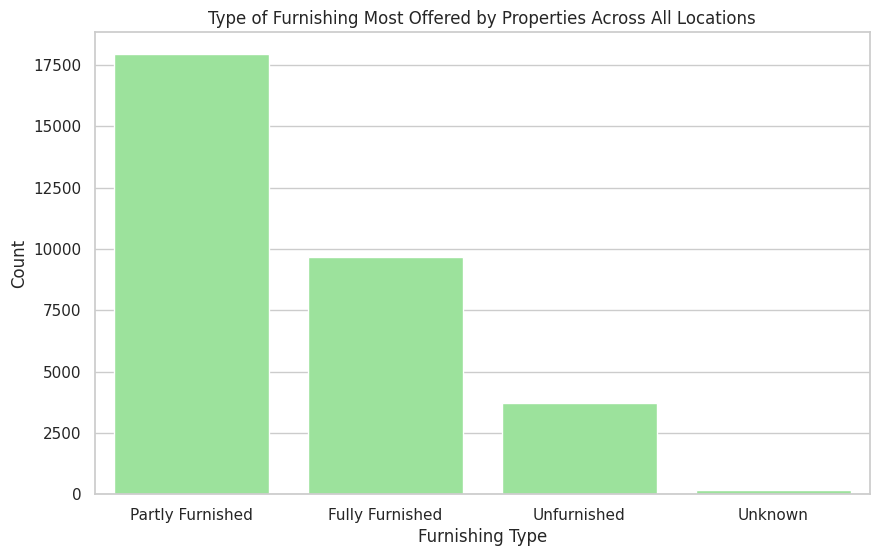

In [62]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a bar plot
sns.countplot(x='Furnishing', data=df, color='lightgreen', order=df['Furnishing'].value_counts().index)

# Add title and labels
plt.title('Type of Furnishing Most Offered by Properties Across All Locations')
plt.xlabel('Furnishing Type')
plt.ylabel('Count')

# Show the plot
plt.show()

**ANSWER**

The most offered type of furnishing across Kuala Lumpur is: `Partly Furnished`

### **Q8: What is the average size of properties in the area?**

**ANSWER**

In [ ]:
df.groupby(['Location']).agg(Average_Size=('Size', 'mean')).round(2).sort_values(by=['Average_Size'], ascending=False)

,Average_Size
Location,
Jinjang,16781.38
Taman Duta,16096.07
Setiawangsa,13401.46
"Taman Yarl, Uog",9440.00
Country Heights Damansara,9274.35
...,...
Canary Residence,990.00
Jalan Sultan Ismail,959.96
Desa Petaling,928.84


###**Q9: How does property size vary in different type of property?**

**ANSWER**

In [ ]:
df.groupby(['Property Type Supergroup']).agg(Average_Size=('Size', 'mean')).round(2).sort_values(by=['Average_Size'], ascending=False)

,Average_Size
Property Type Supergroup,
Residential Land,12722.27
Bungalow,9212.43
Semi-detached House,4180.13
Apartment,2005.60
Terrace/Link House,1963.84
Condominium,1893.28
Townhouse,1741.24
Cluster House,1549.75
Serviced Residence,1313.39


###**Q10: What is the average property price based on property types?**

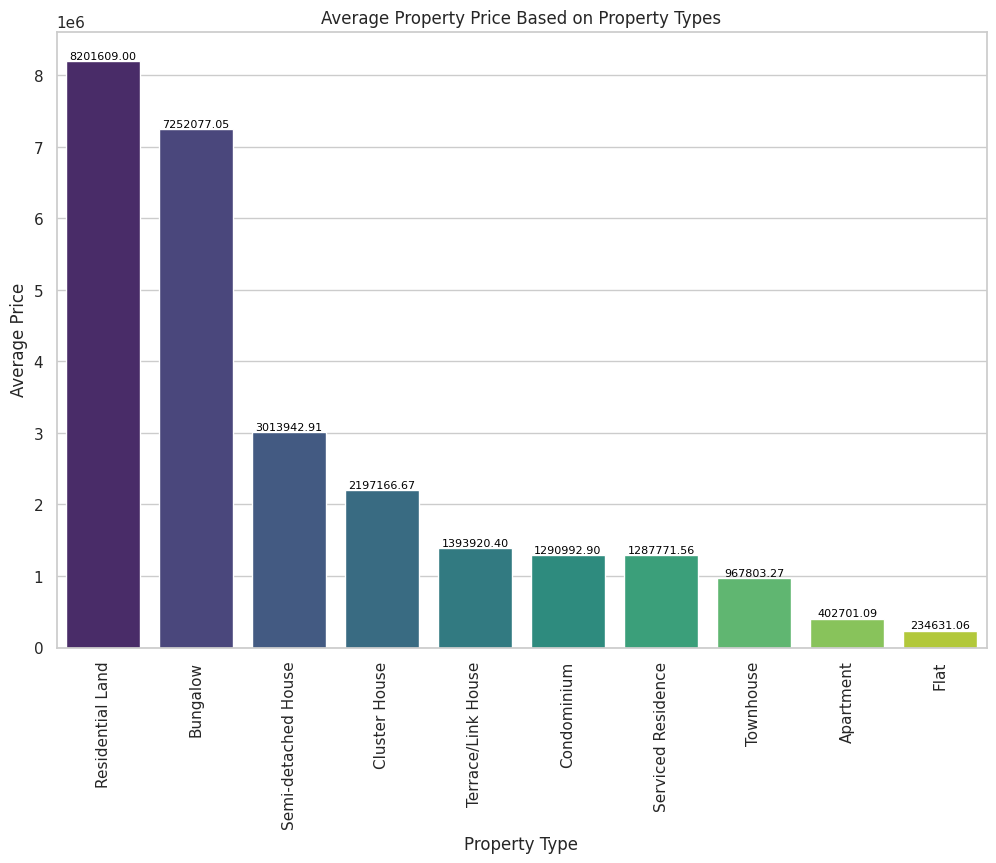

In [73]:
# Calculate the average property price for each property type
average_prices = df.groupby('Property Type Supergroup')['Price'].mean().sort_values(ascending=False)

# Set up the figure and axes
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create a bar plot
ax = sns.barplot(x=average_prices.index, y=average_prices.values, palette='viridis')

# Add title and labels
plt.title('Average Property Price Based on Property Types')
plt.xlabel('Property Type')
plt.ylabel('Average Price')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add values on top of the bars
for i, value in enumerate(average_prices.values):
    ax.text(i, value + 1000, f'{value:.2f}', ha='center', va='bottom', fontsize=8, color='black')

# Show the plot
plt.show()

**ANSWER**

The average price for each of the property types:

1. Residential Land: `RM 8,201,609.00`
2. Bungalow: `RM 7,252077.05`
3. Semi-detached House: `RM 3,013,942.91`
4. Cluster House: `RM 2,197166.67`
5. Terrace/Link House: `RM 1,393920.40`
6. Condominium: `RM 1,290,992.90`
7. Serviced Residence: `RM 1,287,771.56`
8. Townhouse: `RM 967,803.37`
9. Apartment: `RM 402,701.09`
10. Flat: `RM 234,631.06`



---



## **Inferences and Conclusion**

In this project, we looked at a dataset with information about properties. We used graphs to help us understand the data.

We found that bigger properties tend to cost more, and properties with more rooms also have higher prices. This makes sense because larger and more spacious properties are usually more expensive.

The graphs showed that the number of rooms and property size have a positive relationship with the property's price. There were no strong negative relationships or confusing connections between the numbers.

In conclusion, the size and the number of rooms are important factors that influence property prices. But, we might need more data to make more precise predictions about property prices.



---



## **References and Future Work**



**References**:

Matplotlib: https://matplotlib.org/

Seaborn: https://seaborn.pydata.org/

Pandas: https://pandas.pydata.org/

Python: https://www.python.org/


**Future Work**:

In future work, it is recommended to expand and enhance this project in the following ways:
1. Collaboration with Real Estate Experts:

  Collaborate with real estate experts or professionals to gain domain-specific insights and refine the analysis. Their expertise can contribute to a more accurate understanding of the real estate market.

2. Enhanced EDA Techniques:

  Explore advanced exploratory data analysis (EDA) techniques, including statistical tests and more sophisticated visualizations, to uncover hidden patterns and relationships in the data.